<a href="https://colab.research.google.com/github/HolyMuchii/HolyMuchii/blob/main/Image/Convolu%C3%A7%C3%A3o_de_Imagem_para_Visualiza%C3%A7%C3%A3o_Tabela_de_Dados_(JPEG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio as io
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
def image_to_rgb(image):
  r = image[:,:,0]
  g = image[:,:,1]
  b = image[:,:,2]
  return r,g,b

def rgb_to_y(r,g,b):
  y=(0.299*r + 0.587*g + 0.114*b)/255
  np.clip(y,0,1)
  return y

# Fazer Uma Imagem Ilustrativa com Tabela (PIL - Image)

(-0.5, 299.5, 244.5, -0.5)

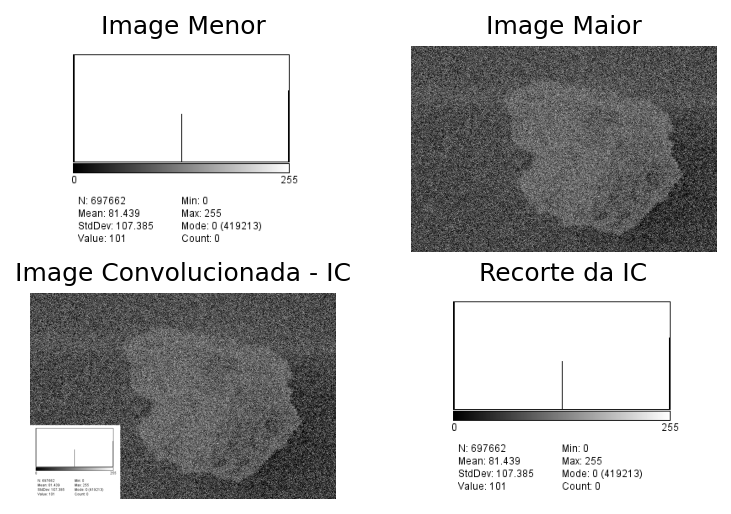

In [ ]:
Diretorio_da_Imagem_Maior = '/content/residuo 2 do 85jpeg.tif' #@param {type:"string"}
Diretorio_da_Imagem_Menor = '/content/Histogram 2 do 85jpeg.tif' #@param {type:"string"}

ImagemMenor = Image.open(Diretorio_da_Imagem_Menor)
ImagemMaior = Image.open(Diretorio_da_Imagem_Maior)

top = ImagemMaior.size[1]-ImagemMenor.size[1]
left = 0
right = ImagemMenor.size[0]
bottom = top + ImagemMenor.size[1]-1

MaiorCopia=ImagemMaior.copy()
MaiorCopia.paste(ImagemMenor,(left,top))

RecorteCM = MaiorCopia.crop((left,top,right,bottom))

Nome_do_Aquivo_Salvo = 'Residuo 2 do 85 JPEG.JPG' #@param {type:"string"}
MaiorCopia.save(Nome_do_Aquivo_Salvo)

fig,ax = plt.subplots(2,2, dpi=150)

ax[0,0].imshow(ImagemMenor)
ax[0,0].set_title('Image Menor')
ax[0,0].axis('off')

ax[0,1].imshow(ImagemMaior,'gray')
ax[0,1].set_title('Image Maior')
ax[0,1].axis('off')

ax[1,0].imshow(MaiorCopia,'gray')
ax[1,0].set_title('Image Convolucionada - IC')
ax[1,0].axis('off')

ax[1,1].imshow(RecorteCM,'gray')
ax[1,1].set_title('Recorte da IC')
ax[1,1].axis('off')

In [ ]:
image=io.imread(Diretorio_da_Imagem_Maior)
number = image.shape[0]*image.shape[1]
number

contotal=0
contzero=0
contelse=0
for i in range((image.shape[0])):
  for j in range(image.shape[1]):
    contotal=contotal+1
    if image[i,j] == 0:
      contzero=contzero+1
    else:
      contelse=contelse+1

print('% Pixels diferentes de Zero: ' ,(contelse/contotal)*100,'%')

% Pixels diferentes de Zero:  39.9117337621943 %


# Estudo de Processamento de Imagem para Visualização de Tabela

- PIL (Image), CV2 e ImageIO

## Abrindo (Read) a Imagem Original com PIL - Image - **Recomendado para Visualização**

- Concerva Descrição da Tabela de Dados
- Não é um sistema que mantem os valores dos Pixels (Indicado para demonstração, mas não para engenharia de dados)


- Tutorial: https://www.youtube.com/watch?v=dkp4wUhCwR4

Text(0.5, 1.0, '(289, 241)')

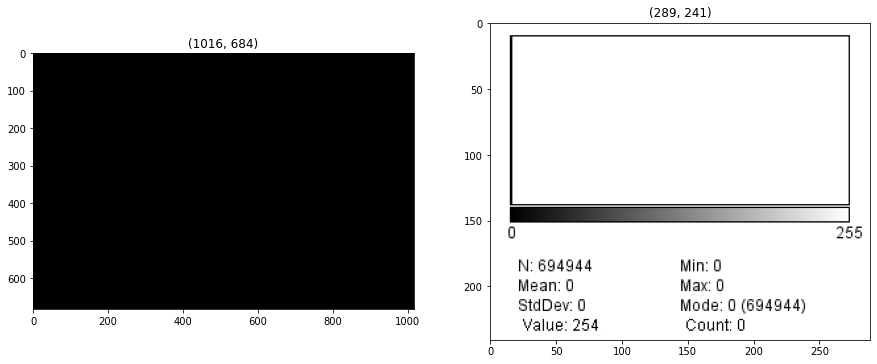

In [ ]:
resi = Image.open('Histogram do residuo 100jpeg.jpg')
imagi = Image.open('residuo do 100jpeg.jpg')

fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(imagi,'gray')
ax[0].set_title(imagi.size)

ax[1].imshow(resi)
ax[1].set_title(resi.size)

In [ ]:
print('Imagem Resíduo: ',imagi.size,"  ",imagi.format,"  ",imagi.mode,'\nHistograma do Resíduo: ',resi.size,"  ",resi.format,"  ",resi.mode)

Imagem Resíduo:  (1016, 684)    JPEG    L 
Histograma do Resíduo:  (289, 241)    JPEG    RGB


In [ ]:
type(imagi)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
top = imagi.size[1]-resi.size[1]
left = 0
right = resi.size[0]
bottom = top + resi.size[1]-1

683

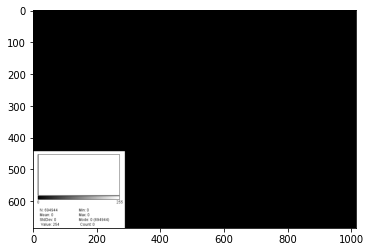

In [ ]:
imagi2=imagi.copy()
imagi2.paste(resi,(left,top))
plt.imshow(imagi2,'gray')

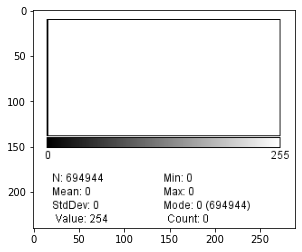

In [ ]:
imagi2c = imagi2.crop((left,top,right,bottom))
plt.imshow(imagi2c,'gray')

In [ ]:
imagi2.save('Residuos 100 JPEG.JPG')

## Abrindo (Read) a Imagem Original com ImageIO - **Não Recomendado para Visualização**

- Salvando a Imagem em ImageIO e CV2
- Re-leitura da Imagem salva com ImageIO e CV2

** Aparece Ruído na Tabela de Dados logo após a convolução de Imagens em JPEG :. Imagem + Imagem Tabela de Dados **

** O ImageIO e o CV não tiveram resposta satisfatória na re-leitura da imagem convolucionada salva **

Text(0.5, 1.0, '(241, 289, 3)')

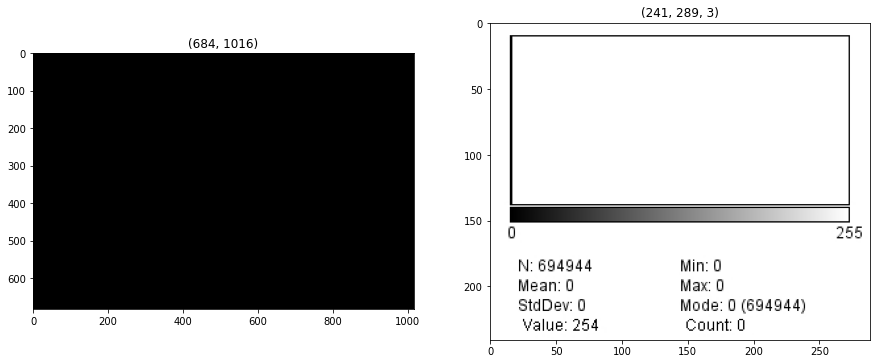

In [ ]:
res = io.imread('Histogram do residuo 100jpeg.jpg')
imag = io.imread('residuo do 100jpeg.jpg')

fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(imag,'gray')
ax[0].set_title(imag.shape)

ax[1].imshow(res)
ax[1].set_title(res.shape)

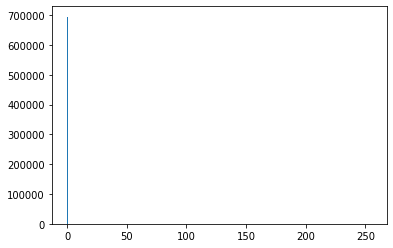

In [ ]:
plt.hist(imag.ravel(),bins=255,range=[0,255])
plt.show()

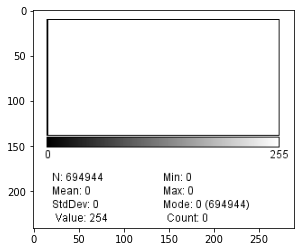

In [ ]:
r,g,b = image_to_rgb(res)
y=rgb_to_y(r,g,b)

plt.imshow(y,'gray')

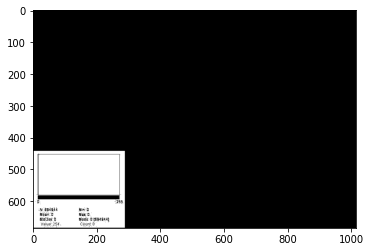

In [ ]:
imag1 =imag.copy()
imag1[442:683,0:289] = y[:,:]
plt.imshow(imag1,'gray')

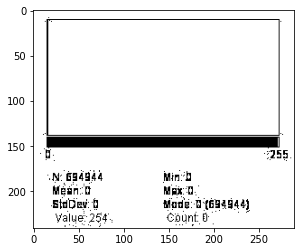

In [ ]:
plt.imshow(imag1[442:683,0:289],'gray')

In [ ]:
cv2.imwrite('CV Residuo 100 JPEG.JPG', imag1)
io.imwrite('Io Residuo 100 JPEG.JPG', imag1)
# imag1.save('PIL Residuo 100 JPEG.JPG')

### Re-leitura da imagem usando o ImageIo

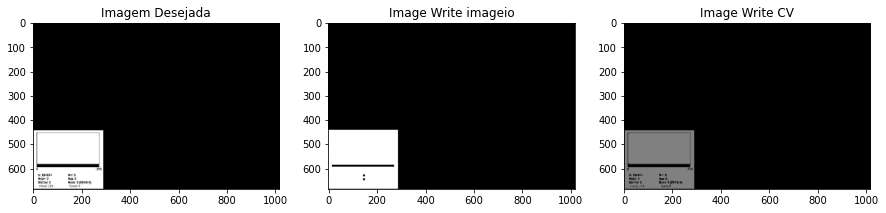

In [ ]:
imCV = io.imread('CV Residuo 100 JPEG.JPG')
imIo = io.imread('Io Residuo 100 JPEG.JPG')

fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(imag1,'gray')
ax[0].set_title('Imagem Desejada')

ax[1].imshow(imIo,'gray')
ax[1].set_title('Image Write imageio')

ax[2].imshow(imCV,'gray')
ax[2].set_title('Image Write CV')
plt.show()

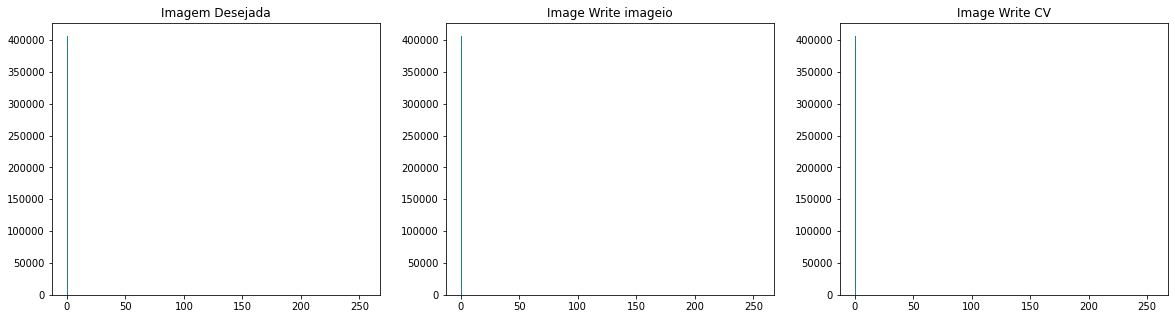

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(imag1[0:400,:].ravel(),bins=255,range=[0,255])
ax[0].set_title('Imagem Desejada')

ax[1].hist(imIo[0:400,:].ravel(),bins=255,range=[0,255])
ax[1].set_title('Image Write imageio')

ax[2].hist(imCV[0:400,:].ravel(),bins=255,range=[0,255])
ax[2].set_title('Image Write CV')
plt.show()

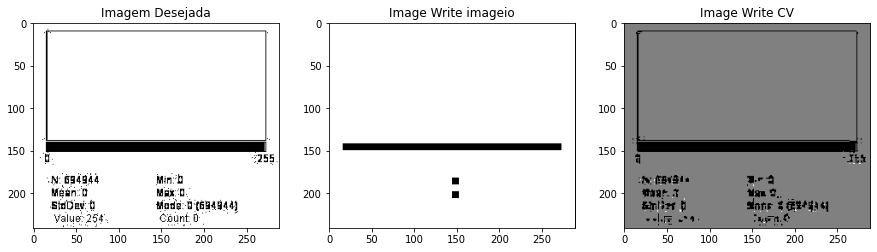

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(imag1[442:683,0:289],'gray')
ax[0].set_title('Imagem Desejada')

ax[1].imshow(imIo[442:683,0:289],'gray')
ax[1].set_title('Image Write imageio')

ax[2].imshow(imCV[442:683,0:289],'gray')
ax[2].set_title('Image Write CV')
plt.show()

### Re-leitura da Imagem usando o CV2

- Não é recomendado fazer re-leitura de imagens com Tabela de Dados

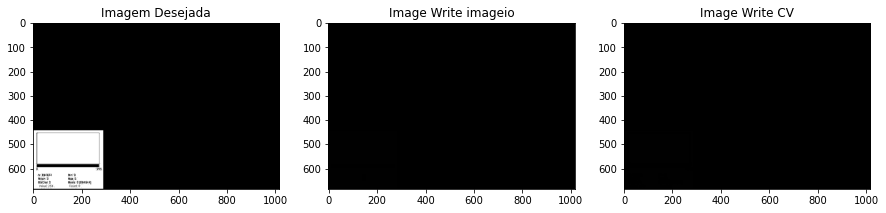

In [ ]:
imCVCV = cv2.imread('CV Residuo 100 JPEG.JPG')
imIoCV = cv2.imread('Io Residuo 100 JPEG.JPG')

fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(imag1,'gray')
ax[0].set_title('Imagem Desejada')

ax[1].imshow(imIoCV,'gray')
ax[1].set_title('Image Write imageio')

ax[2].imshow(imCVCV,'gray')
ax[2].set_title('Image Write CV')
plt.show()

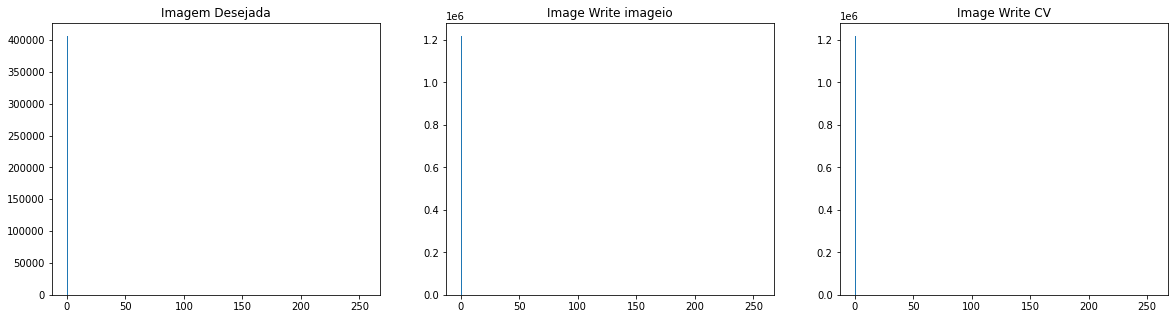

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(imag1[0:400,:].ravel(),bins=255,range=[0,255])
ax[0].set_title('Imagem Desejada')

ax[1].hist(imIoCV[0:400,:].ravel(),bins=255,range=[0,255])
ax[1].set_title('Image Write imageio')

ax[2].hist(imCVCV[0:400,:].ravel(),bins=255,range=[0,255])
ax[2].set_title('Image Write CV')
plt.show()

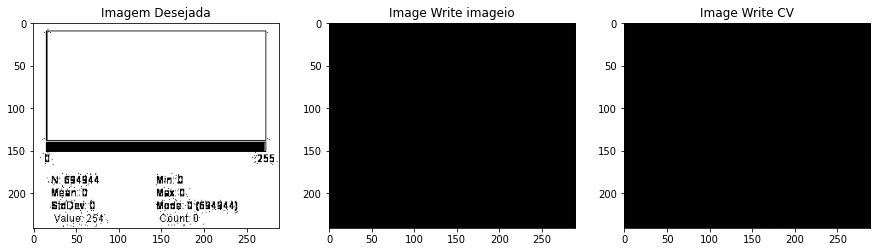

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(imag1[442:683,0:289],'gray')
ax[0].set_title('Imagem Desejada')

ax[1].imshow(imIoCV[442:683,0:289],'gray')
ax[1].set_title('Image Write imageio')

ax[2].imshow(imCVCV[442:683,0:289],'gray')
ax[2].set_title('Image Write CV')
plt.show()